In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


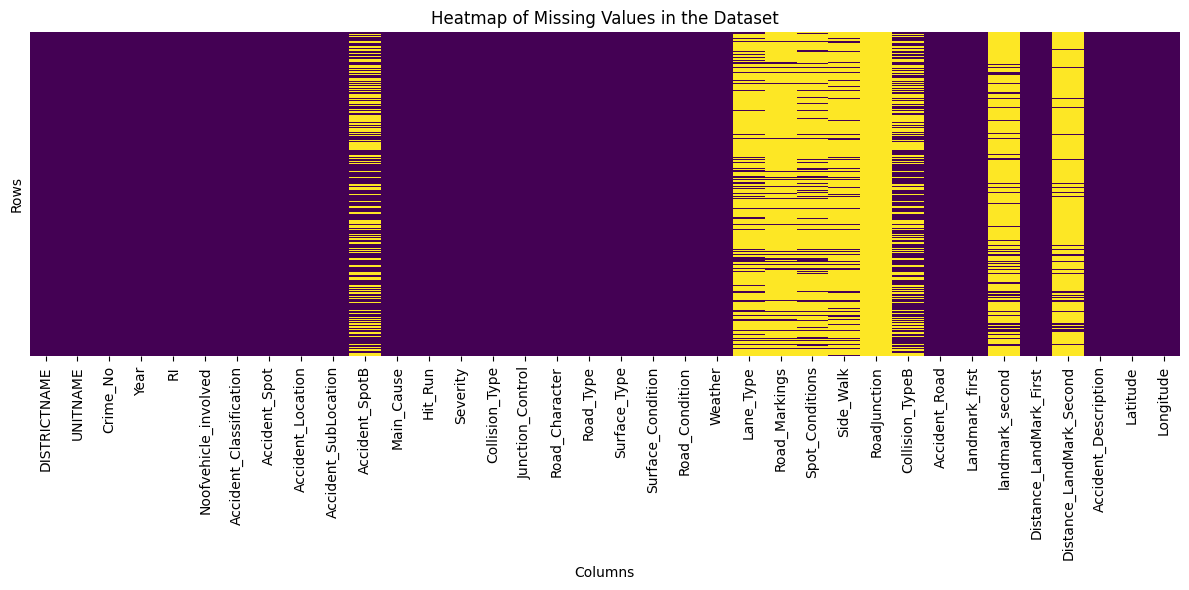

,DISTRICTNAME,Year,Noofvehicle_involved,Main_Cause,Hit_Run,Collision_Type,Weather,Severity,Latitude,Longitude
0,Ramanagara,2023,1,Human Error,No,Hit pedestrian,Clear,Simple Injury,12.392368,77.123048
1,Davanagere,2022,2,Not Applicable,No,Vehicle to Vehicle,Clear,Simple Injury,0.000000,0.000000
2,Bengaluru City,2016,2,Human Error,No,Others,Fine,Not Applicable,0.000000,0.000000
3,Ballari,2018,2,Not Applicable,Yes,Others,Fine,Simple Injury,0.000000,0.000000
4,Davanagere,2020,1,Human Error,No,Hit pedestrian,Others,Fatal,14.242400,75.648421


In [ ]:
import pandas as pd

# Load the dataset with appropriate encoding to prevent read errors
df = pd.read_csv('/content/drive/MyDrive/Datasets/Copy of AccidentReports.csv', encoding='latin1')

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(12, 6))

# Plot heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values in the Dataset")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()

# Select only the 10 relevant columns including Latitude and Longitude (instead of Road_Type)
df = df[['DISTRICTNAME', 'Year', 'Noofvehicle_involved',
         'Main_Cause', 'Hit_Run', 'Collision_Type', 'Weather', 'Severity',
         'Latitude', 'Longitude']]

# Drop rows that contain any missing values
df = df.dropna()

# Randomly select 35,000 clean entries to limit memory usage
df = df.sample(n=35000, random_state=42).reset_index(drop=True)

# Display the first few entries of the cleaned and reduced dataset
df.head()

In [ ]:
# Check data types and unique counts
df.info()

# See unique values in each column (top 10 rows per column)
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique()[:10])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DISTRICTNAME          35000 non-null  object 
 1   Year                  35000 non-null  int64  
 2   Noofvehicle_involved  35000 non-null  int64  
 3   Main_Cause            35000 non-null  object 
 4   Hit_Run               35000 non-null  object 
 5   Collision_Type        35000 non-null  object 
 6   Weather               35000 non-null  object 
 7   Severity              35000 non-null  object 
 8   Latitude              35000 non-null  float64
 9   Longitude             35000 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.7+ MB

Column: DISTRICTNAME
['Ramanagara' 'Davanagere' 'Bengaluru City' 'Ballari' 'Kalaburagi City'
 'Mandya' 'Shivamogga' 'Raichur' 'Tumakuru' 'Chitradurga']

Column: Year
[2023 2022 2016 2018 2020 2019 2017 2021]

Column:

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Load dataset with appropriate encoding
df = pd.read_csv('/content/drive/MyDrive/KarnatakaDataset/Copy of AccidentReports.csv', encoding='latin1')

# Select 10 relevant columns (Latitude & Longitude instead of Road_Type)
df = df[['DISTRICTNAME', 'Year', 'Noofvehicle_involved',
         'Main_Cause', 'Hit_Run', 'Collision_Type', 'Weather', 'Severity',
         'Latitude', 'Longitude']]

# Drop any rows with missing values
df = df.dropna()

# Remove rows where coordinates are zero (invalid data)
df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]

# Cap vehicle count to 5+ for uniformity
df['Noofvehicle_involved'] = df['Noofvehicle_involved'].apply(lambda x: x if x <= 5 else 5)

# Keep only valid severity classes (Fatal, Grievous Injury, Simple Injury)
df = df[df['Severity'].isin(['Fatal', 'Grievous Injury', 'Simple Injury'])]

# Encode 'Severity' column into numeric labels
le = LabelEncoder()
df['Severity_encoded'] = le.fit_transform(df['Severity'])

# Remove 'Not Applicable' from 'Main_Cause'
df = df[df['Main_Cause'] != 'Not Applicable']

# Keep only 'Yes' and 'No' in 'Hit_Run' and encode to 1/0
df = df[df['Hit_Run'].isin(['Yes', 'No'])]
df['Hit_Run'] = df['Hit_Run'].map({'Yes': 1, 'No': 0})

# Keep only the most common and meaningful collision types
valid_collisions = ['Head on', 'Rear end', 'Vehicle to Vehicle', 'Hit pedestrian']
df = df[df['Collision_Type'].isin(valid_collisions)]

# Keep only useful weather conditions and merge similar ones
valid_weather = ['Clear', 'Fine', 'Cloudy', 'Fog / Mist', 'Heavy Rain']
df = df[df['Weather'].isin(valid_weather)]
df['Weather'] = df['Weather'].replace({'Fine': 'Clear'})  # unify 'Clear' and 'Fine'

# Randomly sample 34,000 rows from the cleaned dataset
df = df.sample(n=34000, random_state=42).reset_index(drop=True)

# Final check of cleaned data
print(df.info())
print("\nSeverity Distribution:\n", df['Severity'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DISTRICTNAME          34000 non-null  object 
 1   Year                  34000 non-null  int64  
 2   Noofvehicle_involved  34000 non-null  int64  
 3   Main_Cause            34000 non-null  object 
 4   Hit_Run               34000 non-null  int64  
 5   Collision_Type        34000 non-null  object 
 6   Weather               34000 non-null  object 
 7   Severity              34000 non-null  object 
 8   Latitude              34000 non-null  float64
 9   Longitude             34000 non-null  float64
 10  Severity_encoded      34000 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.9+ MB
None

Severity Distribution:
 Severity
Grievous Injury    18288
Simple Injury       7914
Fatal               7798
Name: count, dtype: int64


In [ ]:
# Display class distribution of the encoded Severity column
df['Severity_encoded'].value_counts()

,count
Severity_encoded,
1,18288
2,7914
0,7798


In [ ]:
from sklearn.utils import resample

# Split the dataset by severity class
grievous_df = df[df['Severity'] == 'Grievous Injury']
fatal_df = df[df['Severity'] == 'Fatal']
simple_df = df[df['Severity'] == 'Simple Injury']

# Undersample Grievous Injury class to 13,000
grievous_sampled = grievous_df.sample(n=13000, random_state=42)

# Oversample Fatal class to 13,000 (with replacement)
fatal_oversampled = resample(fatal_df,
                             replace=True,     # Sample with replacement
                             n_samples=13000,  # Match target number
                             random_state=42)  # Reproducibility

# Oversample Simple Injury class to 13,000 (with replacement)
simple_oversampled = resample(simple_df,
                              replace=True,
                              n_samples=13000,
                              random_state=42)

# Combine all three balanced subsets
df_balanced = pd.concat([grievous_sampled, fatal_oversampled, simple_oversampled], axis=0)

# Shuffle the combined dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new distribution of severity classes
print("Balanced Class Distribution:\n")
print(df_balanced['Severity'].value_counts())

Balanced Class Distribution:

Severity
Grievous Injury    13000
Simple Injury      13000
Fatal              13000
Name: count, dtype: int64


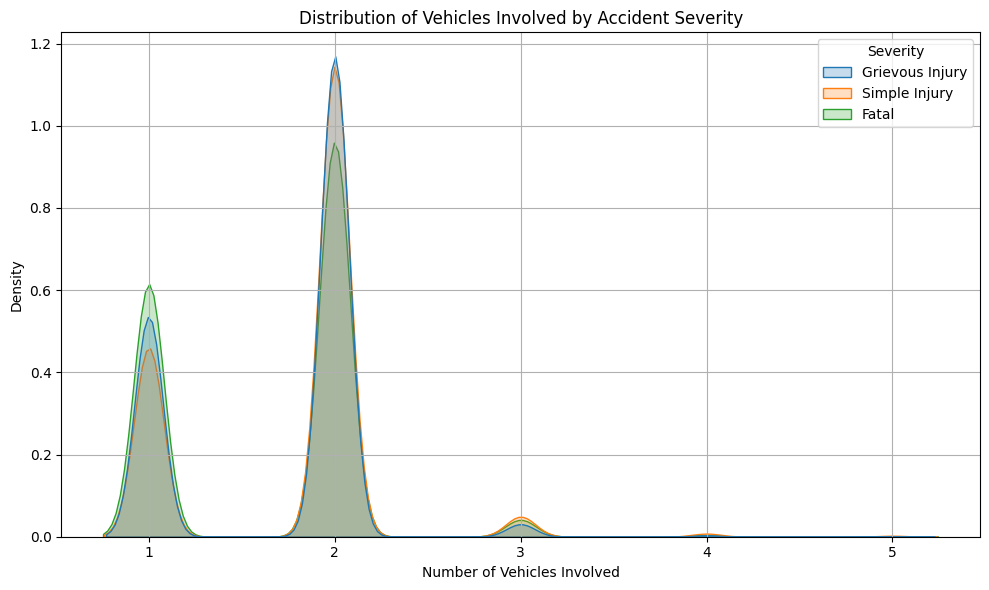

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot to visualize relation between No of vehicles and Severity of Accident
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_balanced, x='Noofvehicle_involved', hue='Severity', fill=True)

# Add a meaningful title to explain what the graph shows
plt.title("Distribution of Vehicles Involved by Accident Severity")

# Set axis labels for clarity
plt.xlabel("Number of Vehicles Involved")
plt.ylabel("Density")

# Show grid for better readability
plt.grid(True)

# Ensure the layout fits well within the plot window
plt.tight_layout()

# Display the plot
plt.show()

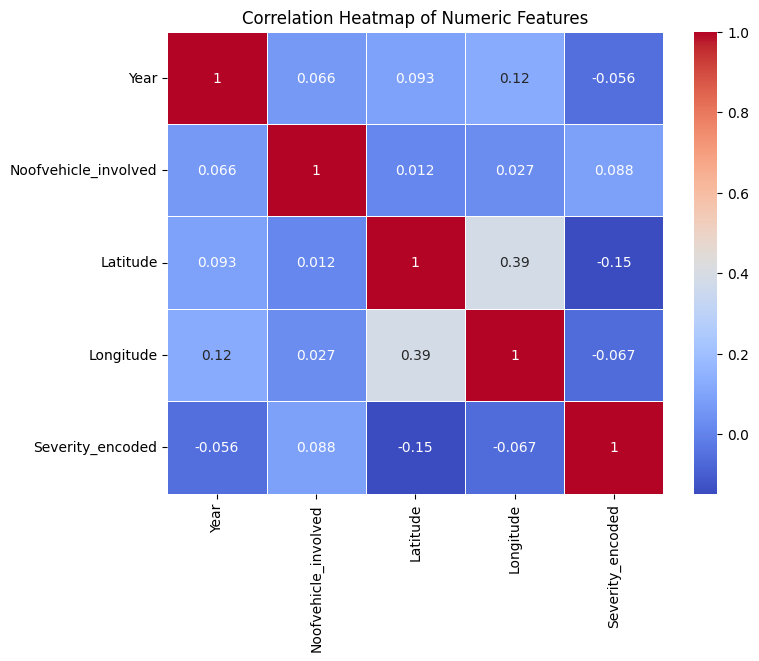

In [ ]:
# Correlation Heat map

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis
numeric_cols = df_balanced[['Year', 'Noofvehicle_involved', 'Latitude', 'Longitude', 'Severity_encoded']]

# Compute correlation matrix
corrln = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corrln, annot=True, cmap='coolwarm', linewidths=0.5)

# Add plot title
plt.title("Correlation Heatmap of Numeric Features")

# Display the plot
plt.show()

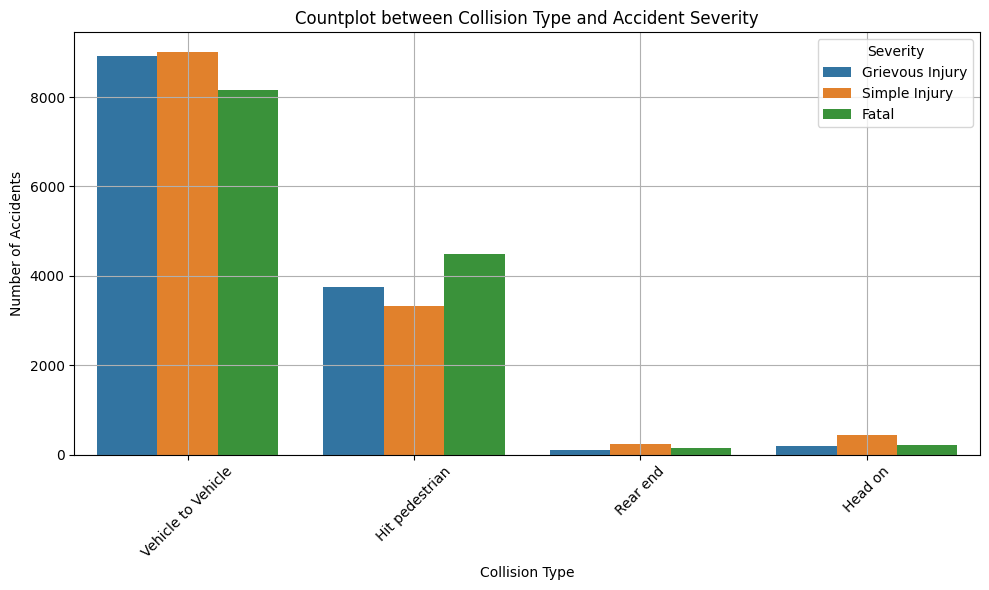

In [ ]:
# Countplot b/w Collision type and Accident severity

import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to show how collision types vary by accident severity
plt.figure(figsize=(10, 6))
sns.countplot(data=df_balanced, x='Collision_Type', hue='Severity')

# Title and labels for clarity
plt.title("Countplot between Collision Type and Accident Severity")
plt.xlabel("Collision Type")
plt.ylabel("Number of Accidents")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for readability
plt.grid(True)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,        # More trees for stability
    max_depth=15,            # Prevents overfitting
    min_samples_split=10,    # Avoids splitting on noise
    min_samples_leaf=4,      # Ensures generalization
    random_state=42
)

from sklearn.preprocessing import LabelEncoder

# Define features and target
X = df_balanced.drop(columns=['Severity', 'Severity_encoded'])  # Drop text + encoded version
y = df_balanced['Severity_encoded']  # Target

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train logistic regression model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test data
y_pred = model.predict(X_test)

# Print accuracy
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))

# Detailed report using original class labels
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy on Test Data: 0.7632051282051282

Classification Report:

                 precision    recall  f1-score   support

          Fatal       0.76      0.83      0.79      2655
Grievous Injury       0.74      0.59      0.66      2588
  Simple Injury       0.78      0.87      0.83      2557

       accuracy                           0.76      7800
      macro avg       0.76      0.76      0.76      7800
   weighted avg       0.76      0.76      0.76      7800



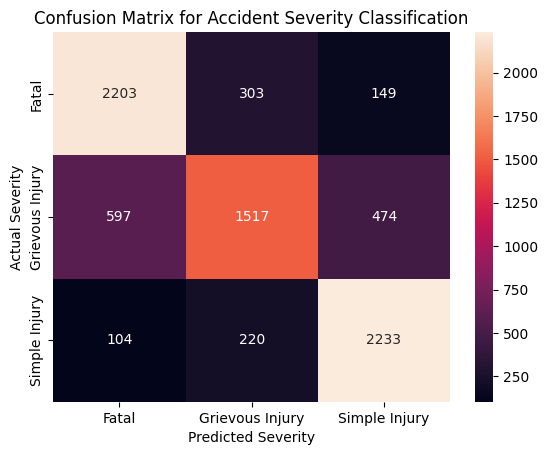

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap with labeled axes using severity class names
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,  # Predicted labels
            yticklabels=le.classes_)  # Actual labels

plt.title("Confusion Matrix for Accident Severity Classification")
plt.xlabel("Predicted Severity")
plt.ylabel("Actual Severity")

plt.show()

In [ ]:
!pip install geopandas
!pip install folium

In [ ]:
import geopandas as gpd

# Load the Karnataka district boundaries
karnataka_gdf = gpd.read_file('/content/drive/MyDrive/KarnatakaDataset/karnataka.geojson')

In [ ]:
import folium

# Center map on Karnataka
map_center = [15.3173, 75.7139]
m = folium.Map(location=map_center, zoom_start=7, tiles='OpenStreetMap')

# Add district outlines
folium.GeoJson(karnataka_gdf, name='Districts').add_to(m)

# Add accident markers (sample for clarity)
severity_colors = {'Fatal':'red','Grievous Injury':'orange','Simple Injury':'green'}
for _, row in df_balanced.sample(n=1000).iterrows():
    folium.CircleMarker(
        [row['Latitude'], row['Longitude']],
        radius=3,
        color=severity_colors[row['Severity']],
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

folium.LayerControl().add_to(m)
m
